In [3]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# URL de la page principale
url = "http://books.toscrape.com/"

In [5]:
# URL de la page principale
url = "http://books.toscrape.com/"
#url="http://books.toscrape.com/catalogue/page-1.html"
# Envoyer une requête GET à l'URL
response = requests.get(url)

# Vérifier si la requête s'est bien déroulée
if response.status_code == 200:
    # Analyser le contenu HTML de la page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trouver tous les liens de livres sur la page principale
    book_links = soup.find_all('h3')

    
    # Parcourir les liens de livres
    for link in book_links:
        # Extraire le titre du livre
        title = link.a.attrs['title']

        # Accéder à la page de détails du livre
        book_url = url + link.a.attrs['href']
        book_response = requests.get(book_url)
        book_soup = BeautifulSoup(book_response.text, 'html.parser')

        # Extraire le prix du livre
        price = book_soup.find('p', class_='price_color').text

        # Extraire la notation du livre
        rating = book_soup.find('p', class_='star-rating')['class'][1]

        # Imprimer les informations extraites
        print(f"Titre : {title}")
        print(f"Price : {price}")
        print(f"Rating : {rating}")


Titre : A Light in the Attic
Price : Â£51.77
Rating : Three
Titre : Tipping the Velvet
Price : Â£53.74
Rating : One
Titre : Soumission
Price : Â£50.10
Rating : One
Titre : Sharp Objects
Price : Â£47.82
Rating : Four
Titre : Sapiens: A Brief History of Humankind
Price : Â£54.23
Rating : Five
Titre : The Requiem Red
Price : Â£22.65
Rating : One
Titre : The Dirty Little Secrets of Getting Your Dream Job
Price : Â£33.34
Rating : Four
Titre : The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price : Â£17.93
Rating : Three
Titre : The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price : Â£22.60
Rating : Four
Titre : The Black Maria
Price : Â£52.15
Rating : One
Titre : Starving Hearts (Triangular Trade Trilogy, #1)
Price : Â£13.99
Rating : Two
Titre : Shakespeare's Sonnets
Price : Â£20.66
Rating : Four
Titre : Set Me Free
Price : Â£17.46
Rating : Five
Titre : Scott Pilgrim's Precious Little Life (Scott Pilgrim

In [6]:
print(link)

<h3><a href="catalogue/its-only-the-himalayas_981/index.html" title="It's Only the Himalayas">It's Only the Himalayas</a></h3>


In [7]:
print(link.find('a').get('title'))

It's Only the Himalayas


In [8]:
print(book_links)

[<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>, <h3><a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>, <h3><a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a></h3>, <h3><a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>, <h3><a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a></h3>, <h3><a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a></h3>, <h3><a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a></h3>, <h3><a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html

In [9]:
# Créer une liste avec les liens href de toutes les catégories
categories_urls=[]
categorie_list=soup.find('ul',{'class':'nav-list'})
categories=categorie_list.find_all('a')
for elt in categories:
    
    categories_urls.append('http://books.toscrape.com/'+elt.get('href'))
    
categories_urls

['http://books.toscrape.com/catalogue/category/books_1/index.html',
 'http://books.toscrape.com/catalogue/category/books/travel_2/index.html',
 'http://books.toscrape.com/catalogue/category/books/mystery_3/index.html',
 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html',
 'http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html',
 'http://books.toscrape.com/catalogue/category/books/classics_6/index.html',
 'http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html',
 'http://books.toscrape.com/catalogue/category/books/romance_8/index.html',
 'http://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html',
 'http://books.toscrape.com/catalogue/category/books/fiction_10/index.html',
 'http://books.toscrape.com/catalogue/category/books/childrens_11/index.html',
 'http://books.toscrape.com/catalogue/category/books/religion_12/index.html',
 'http://books.toscrape.com/catalogue/category/books/nonfictio

In [10]:
categories

[<a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
                             
                         </a>,
 <a href="catalogue/catego

In [11]:
# Fonction pour extraire les informations d'une page donnée
def extract_book_info(page_url):
    books=[]
    response = requests.get(page_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        #livres = soup.find_all(class_='product_pod')
        livres = soup.find_all('article', {'class': 'product_pod'})
        #print(livres)
        for livre in livres:
                titre = livre.find("h3").find("a")['title']
                rating = livre.find('p', class_='star-rating')['class'][1]

                prix = livre.find('p', class_='price_color').text
                        

                disponibilite = livre.find('p', class_='instock').text

                books.append({'title': titre, 'rating': rating, 'price': prix, 'availability': disponibilite})
                df_books=pd.DataFrame(books)
                df_books['price'] = df_books['price'].str.extract("([^Â].*)")
                df_books['availability'] = df_books['availability'].str.strip()
        return df_books
df_final = pd.DataFrame()            
for ide in range (1,51):
    page_url1= f'http://books.toscrape.com/catalogue/page-{ide}.html'
    df_books=extract_book_info(page_url1)
    df_final=pd.concat([df_final,df_books])
            

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1000 non-null   object
 1   rating        1000 non-null   object
 2   price         1000 non-null   object
 3   availability  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [17]:
response = requests.get('http://books.toscrape.com/catalogue/page-2.html')
if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        #livres = soup.find_all(class_='product_pod')
        livres = soup.find_all('article', {'class': 'product_pod'})
        print(livres)

[<article class="product_pod">
<div class="image_container">
<a href="in-her-wake_980/index.html"><img alt="In Her Wake" class="thumbnail" src="../media/cache/5d/72/5d72709c6a7a9584a4d1cf07648bfce1.jpg"/></a>
</div>
<p class="star-rating One">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="in-her-wake_980/index.html" title="In Her Wake">In Her Wake</a></h3>
<div class="product_price">
<p class="price_color">Â£12.84</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>, <article class="product_pod">
<div class="image_container">
<a href="how-music-works_979/index.html"><img alt="How Music Works" class="thumbnail" src="../media/cache/5c/c8/5cc8e107246cb478960d4f0aba1e1c8e.jpg"/></a>
</div>
<p class="star-rating

In [19]:
page=[]
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for id_page in range(1, 51):
    page_url= f'http://books.toscrape.com/catalogue/page-{id_page}.html'
    res= requests.get(url, headers=headers)
    
    soup1= BeautifulSoup(res.content, 'html')
    ss=[]
    ep=extract_book_info(page_url)
    #print(len(ss))
    
    
    print("page",id_page,len(ep))
    print(ep)
    
    page.append(ss)
print("===> ",len(page),"page")


page 1 20
                                                title rating   price  \
0                                A Light in the Attic  Three  £51.77   
1                                  Tipping the Velvet    One  £53.74   
2                                          Soumission    One  £50.10   
3                                       Sharp Objects   Four  £47.82   
4               Sapiens: A Brief History of Humankind   Five  £54.23   
5                                     The Requiem Red    One  £22.65   
6   The Dirty Little Secrets of Getting Your Dream...   Four  £33.34   
7   The Coming Woman: A Novel Based on the Life of...  Three  £17.93   
8   The Boys in the Boat: Nine Americans and Their...   Four  £22.60   
9                                     The Black Maria    One  £52.15   
10     Starving Hearts (Triangular Trade Trilogy, #1)    Two  £13.99   
11                              Shakespeare's Sonnets   Four  £20.66   
12                                        Set Me Free 

page 6 20
                                                title rating   price  \
0   Immunity: How Elie Metchnikoff Changed the Cou...   Five  £57.36   
1   I Hate Fairyland, Vol. 1: Madly Ever After (I ...    Two  £29.17   
2                        I am a Hero Omnibus Volume 1  Three  £54.63   
3   How to Be Miserable: 40 Strategies You Already...    One  £46.03   
4       Her Backup Boyfriend (The Sorensen Family #1)    One  £33.97   
5                Giant Days, Vol. 2 (Giant Days #5-8)    Two  £22.11   
6   Forever and Forever: The Courtship of Henry Lo...  Three  £29.69   
7                  First and First (Five Boroughs #3)   Four  £15.97   
8               Fifty Shades Darker (Fifty Shades #2)    One  £21.96   
9   Everydata: The Misinformation Hidden in the Li...    Two  £54.35   
10  Don't Be a Jerk: And Other Practical Advice fr...    Two  £37.97   
11                               Danganronpa Volume 1   Four  £51.99   
12             Crown of Midnight (Throne of Glass #2) 

page 11 20
                                                title rating   price  \
0                                          Dark Notes   Five  £19.19   
1   Daring Greatly: How the Courage to Be Vulnerab...  Three  £19.43   
2                                        Close to You   Four  £49.46   
3   Chasing Heaven: What Dying Taught Me About Living    Two  £37.80   
4              Big Magic: Creative Living Beyond Fear  Three  £30.80   
5   Becoming Wise: An Inquiry into the Mystery and...    Two  £27.43   
6   Beauty Restored (Riley Family Legacy Novellas #3)    Two  £11.11   
7                 Batman: The Long Halloween (Batman)    Two  £36.50   
8            Batman: The Dark Knight Returns (Batman)   Five  £15.38   
9                                      Ayumi's Violin    Two  £15.48   
10                                          Anonymous   Four  £46.82   
11                     Amy Meets the Saints and Sages  Three  £18.46   
12                                     Amid the Chaos

page 16 20
                                                title rating   price  \
0             Hold Your Breath (Search and Rescue #1)    One  £28.82   
1                            Hamilton: The Revolution  Three  £58.79   
2                                Greek Mythic History   Five  £10.23   
3   God: The Most Unpleasant Character in All Fiction   Five  £30.03   
4     Glory over Everything: Beyond The Kitchen House  Three  £45.84   
5             Feathers: Displays of Brilliant Plumage  Three  £49.05   
6   Far & Away: Places on the Brink of Change: Sev...   Four  £15.06   
7                                     Every Last Word  Three  £46.47   
8                    Eligible (The Austen Project #4)  Three  £27.09   
9                                            El Deafo   Five  £57.62   
10                               Eight Hundred Grapes   Four  £14.39   
11  Eaternity: More than 150 Deliciously Easy Vega...   Five  £51.75   
12                                  Eat Fat, Get Thin

page 21 20
                                                title rating   price  \
0                                    Mothering Sunday    Two  £13.34   
1                                Mother, Can You Not?   Five  £16.89   
2                                             M Train    One  £27.18   
3                                         Lilac Girls    Two  £17.28   
4                         Lies and Other Acts of Love    One  £45.14   
5                                            Lab Girl    One  £40.85   
6                                      Keep Me Posted   Four  £20.46   
7   It Didn't Start with You: How Inherited Family...  Three  £56.27   
8                              Grey (Fifty Shades #4)   Four  £48.49   
9                             Exit, Pursued by a Bear   Four  £51.34   
10                                         Daredevils  Three  £16.34   
11         Cravings: Recipes for What You Want to Eat  Three  £20.50   
12  Born for This: How to Find the Work You Were M...

page 26 20
                                                title rating   price  \
0                                    The Story of Art   Four  £41.14   
1                               The Origin of Species   Four  £10.01   
2                                    The Great Gatsby   Four  £36.05   
3                                       The Good Girl  Three  £49.03   
4                                    The Glass Castle    One  £16.24   
5   The Faith of Christopher Hitchens: The Restles...    One  £39.55   
6                                  The Drowning Girls  Three  £35.67   
7          The Constant Princess (The Tudor Court #1)  Three  £16.62   
8               The Bourne Identity (Jason Bourne #1)   Four  £42.78   
9   The Bachelor Girl's Guide to Murder (Herringfo...   Five  £52.30   
10                                       The Art Book    Two  £32.34   
11  The 7 Habits of Highly Effective People: Power...   Four  £33.17   
12  Team of Rivals: The Political Genius of Abraha...

page 31 20
                                                title rating   price  \
0              The Dream Thieves (The Raven Cycle #2)    One  £34.50   
1                                 The Darkest Corners   Five  £11.33   
2                                       The Crossover   Four  £38.77   
3                      The 5th Wave (The 5th Wave #1)    Two  £11.83   
4                              Tell the Wind and Fire  Three  £45.51   
5                                Tell Me Three Things    One  £41.81   
6   Talking to Girls About Duran Duran: One Young ...   Four  £25.15   
7                                          Siddhartha   Five  £34.22   
8               Shiver (The Wolves of Mercy Falls #1)   Five  £16.23   
9                                        Remember Me?  Three  £11.48   
10                    Red Dragon (Hannibal Lecter #1)  Three  £23.37   
11    Peak: Secrets from the New Science of Expertise    Two  £16.28   
12                                 My Mother Was Nuts

page 36 20
                                                title rating   price  \
0                     Walk the Edge (Thunder Road #2)  Three  £32.36   
1                              Voyager (Outlander #3)   Five  £21.07   
2   Very Good Lives: The Fringe Benefits of Failur...  Three  £50.66   
3   Vegan Vegetarian Omnivore: Dinner for Everyone...    Two  £13.66   
4   Unstuffed: Decluttering Your Home, Mind, and Soul    One  £58.09   
5   Under the Banner of Heaven: A Story of Violent...    One  £30.00   
6                                    Two Boys Kissing    Two  £32.74   
7                              Twilight (Twilight #1)    Two  £41.93   
8                                       Twenties Girl    Two  £42.80   
9   Trespassing Across America: One Man's Epic, Ne...    One  £53.51   
10                                Three-Martini Lunch  Three  £23.21   
11                            Thinking, Fast and Slow    One  £21.14   
12                                     The Wild Robot

page 41 20
                                                title rating   price  \
0   Notes from a Small Island (Notes From a Small ...    One  £40.17   
1                        Night (The Night Trilogy #1)    One  £13.51   
2           Neither Here nor There: Travels in Europe  Three  £38.95   
3                                               Naked  Three  £31.69   
4                        Morning Star (Red Rising #3)    One  £29.40   
5   Miracles from Heaven: A Little Girl, Her Journ...    One  £57.83   
6   Midnight Riot (Peter Grant/ Rivers of London -...    Two  £55.46   
7                              Me Talk Pretty One Day    Two  £57.60   
8                           Manuscript Found in Accra    Two  £34.98   
9                                       Lust & Wonder    Two  £11.87   
10                                   Lila (Gilead #3)  Three  £12.47   
11  Life, the Universe and Everything (Hitchhiker'...    Two  £33.26   
12                              Life Without a Recipe

page 46 20
                                                title rating   price  \
0            Fruits Basket, Vol. 2 (Fruits Basket #2)   Five  £11.64   
1   Diary of a Minecraft Zombie Book 1: A Scare of...   Four  £52.88   
2   Y: The Last Man, Vol. 1: Unmanned (Y: The Last...   Four  £18.51   
3                                 While You Were Mine   Five  £41.32   
4         Where Lightning Strikes (Bleeding Stars #3)  Three  £39.77   
5                                       When I'm Gone  Three  £51.96   
6                                      Ways of Seeing   Five  £39.51   
7          Vampire Knight, Vol. 1 (Vampire Knight #1)    One  £15.40   
8                      Vampire Girl (Vampire Girl #1)    Two  £53.82   
9             Twenty Love Poems and a Song of Despair   Four  £30.95   
10         Travels with Charley: In Search of America   Five  £57.82   
11        Three Wishes (River of Time: California #1)    Two  £44.18   
12                This One Moment (Pushing Limits #1)

In [23]:
def collecter_informations_livres(url, category):
    books = []
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    livres = soup.find_all('article', {'class': 'product_pod'})
    for livre in livres:
        titre = livre.h3.a.get('title')
        rating = livre.find('p', {'class': 'star-rating'}).get('class')[1]
        prix = livre.select('div p.price_color')[0].text[2:]
        disponibilite = livre.select('div p.availability')[0].text.strip()
        books.append({'title': titre, 'rating': rating, 'price': prix, 'availability': disponibilite, 'category': category})
    return pd.DataFrame(books)

In [24]:
def collecter_categories_et_noms_livres(url):
    #initialisation des listes
    categories = []
    nb_livres_par_categorie = []
    all_books = []
    categories_urls = []

    #interrogation de la page url donnée en entrée
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    #a. On retrouve l'ensemble des catégories du site : on enregistre leur url dans une liste
    nav_list = soup.find('ul', {'class': 'nav-list'})
    for category in nav_list.find_all('a'):
        categories_urls.append('http://books.toscrape.com/' + category.get('href'))

    #b. On vient interroger chacune des pages urls pour retrouver les livres
    for category_url in categories_urls:
        response = requests.get(category_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        titre_categorie = soup.find('h1').text
        categories.append(titre_categorie)
        nb_livres = 0 #on initie le compteur pour connaitre le nombre de livre par catégorie
        page = 1
        print("Categorie {} : start importing books".format(titre_categorie))
        while True:
            #la boucle pour parcourir l'ensemble des pages de la catégorie
            url = f"{category_url.replace('index.html', '')}page-{page}.html"
            response = requests.get(url)
            if response.status_code == 404:
                #l'url créée f"{category_url.replace('index.html', '')}page-{page}.html" ne fonctionne pas
                #on récupère les informations de l'url précédente
                # on utilise category_url
                df_books = collecter_informations_livres(category_url, titre_categorie)
                nb_livres += len(df_books)
                all_books.append(df_books)
                break
            # on utilise la première fonction pour avoir les informations sur les livres
            #avec l'url créé juste avant
            #on utilise url
            df_books = collecter_informations_livres(url, titre_categorie)
            nb_livres += len(df_books)
            all_books.append(df_books)
            next_button = soup.find('li', {'class': 'next'})
            if not next_button:
                break
            page += 1
        nb_livres_par_categorie.append(nb_livres)
        print("--> done with {} books".format(nb_livres))
    book_infos = pd.concat(all_books, ignore_index=True)
    return categories, nb_livres_par_categorie, book_infos

In [25]:
url = 'http://books.toscrape.com/index.html'
categories, nb_livres_par_categorie, book_infos = collecter_categories_et_noms_livres(url)
print(book_infos.shape)

Categorie Books : start importing books
--> done with 1020 books
Categorie Travel : start importing books
--> done with 11 books
Categorie Mystery : start importing books
--> done with 52 books
Categorie Historical Fiction : start importing books
--> done with 46 books
Categorie Sequential Art : start importing books
--> done with 95 books
Categorie Classics : start importing books
--> done with 19 books
Categorie Philosophy : start importing books
--> done with 11 books
Categorie Romance : start importing books
--> done with 55 books
Categorie Womens Fiction : start importing books
--> done with 17 books
Categorie Fiction : start importing books
--> done with 85 books
Categorie Childrens : start importing books
--> done with 49 books
Categorie Religion : start importing books
--> done with 7 books
Categorie Nonfiction : start importing books
--> done with 130 books
Categorie Music : start importing books
--> done with 13 books
Categorie Default : start importing books
--> done with 17

In [26]:
df_categories = pd.DataFrame({'category': categories, 'nb_books': nb_livres_par_categorie})

In [27]:
df_categories

,category,nb_books
0,Books,1020
1,Travel,11
2,Mystery,52
3,Historical Fiction,46
4,Sequential Art,95
5,Classics,19
6,Philosophy,11
7,Romance,55
8,Womens Fiction,17
9,Fiction,85


In [28]:
book_infos

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books
...,...,...,...,...,...
2255,Why the Right Went Wrong: Conservatism--From G...,Four,52.65,In stock,Politics
2256,Equal Is Unfair: America's Misguided Fight Aga...,One,56.86,In stock,Politics
2257,Amid the Chaos,One,36.58,In stock,Cultural
2258,Dark Notes,Five,19.19,In stock,Erotica


In [29]:
book_infos.to_csv('books_2.csv',index=False,header=True)

In [30]:
df1=pd.read_csv('books_2.csv')
display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(2260, 5)


In [31]:
df1.groupby(['category'])['title'].count()

category
Academic                 1
Add a comment           87
Adult Fiction            1
Art                      8
Autobiography            9
Biography                5
Books                 1020
Business                12
Childrens               49
Christian                3
Christian Fiction        6
Classics                19
Contemporary             3
Crime                    1
Cultural                 1
Default                172
Erotica                  1
Fantasy                 68
Fiction                 85
Food and Drink          50
Health                   4
Historical               2
Historical Fiction      46
History                 18
Horror                  17
Humor                   10
Music                   13
Mystery                 52
New Adult                6
Nonfiction             130
Novels                   1
Paranormal               1
Parenting                1
Philosophy              11
Poetry                  19
Politics                 3
Psychology         

In [32]:
df1.groupby(['title'])['category'].count().sort_values(ascending=False)

title
The Star-Touched Queen                                                                            6
The Requiem Red                                                                                   4
Tipping the Velvet                                                                                4
Soumission                                                                                        4
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics    4
                                                                                                 ..
Lamb: The Gospel According to Biff, Christ's Childhood Pal                                        2
Large Print Heart of the Pride                                                                    2
Last One Home (New Beginnings #1)                                                                 2
Lean In: Women, Work, and the Will to Lead                                                    

In [33]:
df1[df1.title=="The Star-Touched Queen"]

,title,rating,price,availability,category
236,The Star-Touched Queen,Five,46.02,In stock,Books
358,The Star-Touched Queen,Five,32.30,In stock,Books
1900,The Star-Touched Queen,Five,46.02,In stock,Fantasy
1907,The Star-Touched Queen,Five,32.30,In stock,Fantasy
1948,The Star-Touched Queen,Five,46.02,In stock,Fantasy
1955,The Star-Touched Queen,Five,32.30,In stock,Fantasy


In [34]:
df1[df1.title=="salt."]

,title,rating,price,availability,category
269,salt.,Four,46.78,In stock,Books
2061,salt.,Four,46.78,In stock,Poetry


In [35]:
df1.describe(include='all')

,title,rating,price,availability,category
count,2260,2260,2260.000000,2260,2260
unique,999,5,NaN,1,51
top,The Star-Touched Queen,One,NaN,In stock,Books
freq,6,511,NaN,2260,1020
mean,NaN,NaN,35.045257,NaN,NaN
std,NaN,NaN,14.410846,NaN,NaN
min,NaN,NaN,10.000000,NaN,NaN
25%,NaN,NaN,22.110000,NaN,NaN
50%,NaN,NaN,35.880000,NaN,NaN
75%,NaN,NaN,47.610000,NaN,NaN


In [36]:
 #Vérifier les valeurs manquantes
df1.isnull().sum()

title           0
rating          0
price           0
availability    0
category        0
dtype: int64

In [37]:
# Vérifier les doublons dans le DataFrame
doublons = df1[df1.duplicated()]

# Afficher les lignes doublons
doublons

,title,rating,price,availability,category
1000,A Light in the Attic,Three,51.77,In stock,Books
1001,Tipping the Velvet,One,53.74,In stock,Books
1002,Soumission,One,50.10,In stock,Books
1003,Sharp Objects,Four,47.82,In stock,Books
1004,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books
...,...,...,...,...,...
2188,"A la Mode: 120 Recipes in 60 Pairings: Pies, T...",One,38.77,In stock,Food and Drink
2189,Cravings: Recipes for What You Want to Eat,Three,20.50,In stock,Food and Drink
2190,The Moosewood Cookbook: Recipes from Moosewood...,Four,12.34,In stock,Food and Drink
2191,32 Yolks,Two,53.63,In stock,Food and Drink


In [38]:
# Vérifier les doublons dans le DataFrame
print(df1.shape)
print(df1.drop_duplicates().shape)
df1=df1.drop_duplicates()

(2260, 5)
(2000, 5)


In [39]:
#Combien de valeurs différentes pour rating ?
df1['rating'].unique()
# Conversion de la colonne "rating" en un type numérique
df1['rating'] = df1['rating'].map({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})

In [40]:
print(df1['price'].dtype)

float64


In [41]:
df1['availability'].value_counts()

availability
In stock    2000
Name: count, dtype: int64

In [42]:
# Conversion de la colonne "availability" en un type boolean ((False pour "Out of stock" et True pour "In stock"))
df1['availability'] = df1['availability'].str.contains('In stock')

In [43]:
df1

,title,rating,price,availability,category
0,A Light in the Attic,3,51.77,True,Books
1,Tipping the Velvet,1,53.74,True,Books
2,Soumission,1,50.10,True,Books
3,Sharp Objects,4,47.82,True,Books
4,Sapiens: A Brief History of Humankind,5,54.23,True,Books
...,...,...,...,...,...
2255,Why the Right Went Wrong: Conservatism--From G...,4,52.65,True,Politics
2256,Equal Is Unfair: America's Misguided Fight Aga...,1,56.86,True,Politics
2257,Amid the Chaos,1,36.58,True,Cultural
2258,Dark Notes,5,19.19,True,Erotica


In [45]:
from sqlalchemy.engine import create_engine
import sqlite3
from pandas.io import sql
import subprocess

connection= sqlite3.connect('database_books') 


create_categories_table = '''
    CREATE TABLE IF NOT EXISTS Categories (
        category_id INTEGER PRIMARY KEY AUTOINCREMENT,
        category_name VARCHAR(255)
    );
    '''
create_ratings_table = '''
    CREATE TABLE IF NOT EXISTS Ratings (
        rating_id INTEGER PRIMARY KEY AUTOINCREMENT,
        rating_name VARCHAR(10)
    );
    '''

create_books_table = '''
    CREATE TABLE IF NOT EXISTS Books (
        book_id INTEGER PRIMARY KEY AUTOINCREMENT,
        title VARCHAR(255),
        price DECIMAL(10, 2),
        availability BOOLEAN,
        rating_id INT,
        FOREIGN KEY (rating_id) REFERENCES Ratings(rating_id) ON DELETE CASCADE
    );
    '''

create_link = '''
    CREATE TABLE IF NOT EXISTS Correspondance_Books_Cat (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        book_id,
        category_id,
        FOREIGN KEY (book_id) REFERENCES Books(book_id) ON DELETE CASCADE,
        FOREIGN KEY (category_id) REFERENCES Categories(category_id) ON DELETE CASCADE
    );
    '''


connection.execute(create_categories_table)
connection.execute(create_ratings_table)
connection.execute(create_books_table)
connection.execute(create_link)
connection.commit()

In [46]:
#Category Table
categories_df = df1[['category']].drop_duplicates()
categories_df.head()

,category
0,Books
1020,Travel
1031,Mystery
1083,Historical Fiction
1129,Sequential Art


In [47]:
for i, row in categories_df.iterrows():
    category_name = row['category']
    insert_category_query = '''INSERT INTO Categories (category_name) VALUES (?);'''
    connection.execute(insert_category_query, (category_name,))
    connection.commit()

In [48]:
ratings_df = df1[['rating']].drop_duplicates()
ratings_df

,rating
0,3
1,1
3,4
4,5
10,2


In [49]:
for _, row in ratings_df.iterrows():
    rating_name = int(row['rating'])
    insert_rating_query ='''INSERT INTO Ratings (rating_name) VALUES (?);'''
    connection.execute(insert_rating_query, (rating_name,))
    connection.commit()

In [50]:
cursor = connection.cursor()
cursor.execute("SELECT * FROM Ratings")
rows = cursor.fetchall()

In [51]:
rat_id=pd.DataFrame(rows, columns=["rating_id","rating_name"])
rat_id

,rating_id,rating_name
0,1,3
1,2,1
2,3,4
3,4,5
4,5,2


In [52]:
rat_id.dtypes

rating_id       int64
rating_name    object
dtype: object

In [53]:
livre = df1[['title','price','availability','rating']].copy()
print(livre.shape)
print(livre.title.nunique())
livre = livre.drop_duplicates('title')

(2000, 4)
999


In [54]:
livre["rating"]=livre["rating"].astype(str)

In [55]:
livre2 = pd.merge(livre,rat_id, how='left', left_on="rating", right_on="rating_name")
livre2

,title,price,availability,rating,rating_id,rating_name
0,A Light in the Attic,51.77,True,3,1,3
1,Tipping the Velvet,53.74,True,1,2,1
2,Soumission,50.10,True,1,2,1
3,Sharp Objects,47.82,True,4,3,4
4,Sapiens: A Brief History of Humankind,54.23,True,5,4,5
...,...,...,...,...,...,...
994,Alice in Wonderland (Alice's Adventures in Won...,55.53,True,1,2,1
995,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,True,4,3,4
996,A Spy's Devotion (The Regency Spies of London #1),16.97,True,5,4,5
997,1st to Die (Women's Murder Club #1),53.98,True,1,2,1


In [56]:
for _, row in livre2.iterrows():
    title = row['title']
    price = float(row['price']) 
    availability = row['availability']
    rating_id = row['rating_id']
    insert_livre_query ='''INSERT INTO Books (title, price, availability, rating_id) VALUES (?,?,?,?);'''
    cursor.execute(insert_livre_query, (title,price,availability,rating_id))
    connection.commit()

In [57]:
### Table correspondace

#1. récupérer les id livres de sql
cursor = connection.cursor()
cursor.execute("SELECT book_id, title FROM Books")
rows = cursor.fetchall()
livre_ids = pd.DataFrame(rows, columns=["book_id","title"])


#2. récupérer les id categorie de sql
cursor = connection.cursor()
cursor.execute("SELECT category_id, category_name FROM Categories")
rows = cursor.fetchall()
cat_ids = pd.DataFrame(rows, columns=["category_id","category_name"])

In [58]:
df1 = df1.merge(livre_ids, how='left', on='title')
df1 = df1.merge(cat_ids, how='left', left_on='category', right_on = 'category_name')

In [59]:
df1

,title,rating,price,availability,category,book_id,category_id,category_name
0,A Light in the Attic,3,51.77,True,Books,1,1,Books
1,Tipping the Velvet,1,53.74,True,Books,2,1,Books
2,Soumission,1,50.10,True,Books,3,1,Books
3,Sharp Objects,4,47.82,True,Books,4,1,Books
4,Sapiens: A Brief History of Humankind,5,54.23,True,Books,5,1,Books
...,...,...,...,...,...,...,...,...
1995,Why the Right Went Wrong: Conservatism--From G...,4,52.65,True,Politics,220,48,Politics
1996,Equal Is Unfair: America's Misguided Fight Aga...,1,56.86,True,Politics,383,48,Politics
1997,Amid the Chaos,1,36.58,True,Cultural,213,49,Cultural
1998,Dark Notes,5,19.19,True,Erotica,201,50,Erotica


In [60]:
#3 Insert book_id - category_id in sql

for _, row in df1.iterrows():
    book_id = row['book_id']
    category_id = row['category_id']
    insert_corr_query ='''INSERT INTO Correspondance_Books_Cat (book_id,category_id) VALUES (?,?);'''
    connection.execute(insert_corr_query, (book_id,category_id))
    connection.commit()

In [61]:
#4. Verification
cursor = connection.cursor()
cursor.execute("SELECT * FROM Correspondance_Books_Cat")
rows = cursor.fetchall()
pd.DataFrame(rows, columns=["id","book_id","category_id"])

,id,book_id,category_id
0,1,1,1
1,2,2,1
2,3,3,1
3,4,4,1
4,5,5,1
...,...,...,...
1995,1996,220,48
1996,1997,383,48
1997,1998,213,49
1998,1999,201,50


In [62]:
df1=pd.read_csv('books_2.csv')
display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(2260, 5)


In [63]:
# Vérifier les doublons dans le DataFrame
print(df1.shape)
print(df1.drop_duplicates().shape)
df1=df1.drop_duplicates()

(2260, 5)
(2000, 5)


In [64]:
display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(2000, 5)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


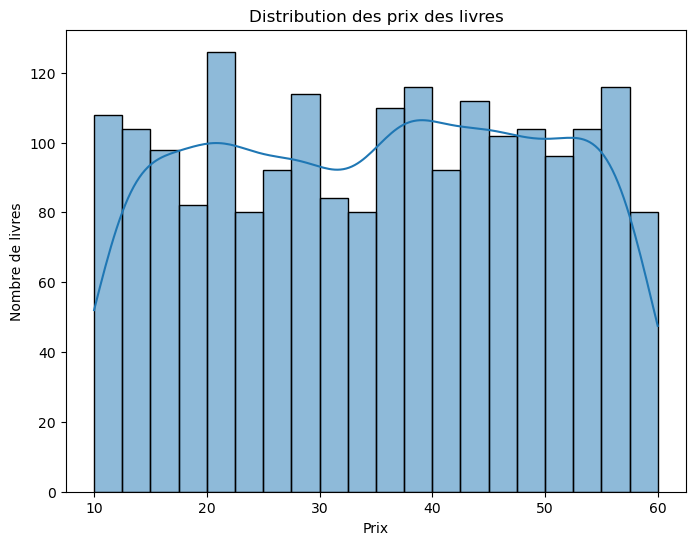

In [65]:
# Distribution de la variable 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df1['price'], bins=20, kde=True)
plt.xlabel('Prix')
plt.ylabel('Nombre de livres')
plt.title('Distribution des prix des livres')
plt.show()

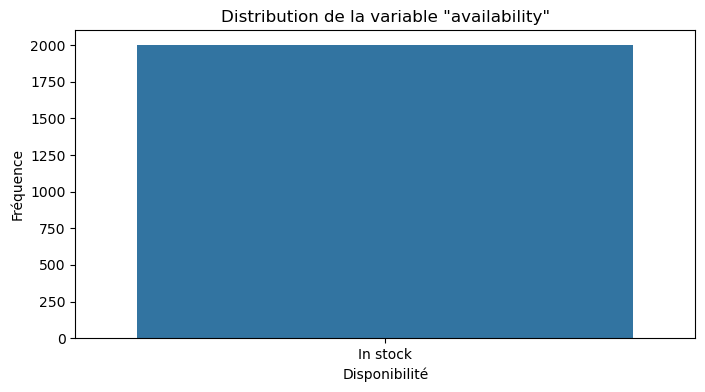

In [66]:
#Distribution de la variable 'availability' 
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='availability')
plt.title('Distribution de la variable "availability"')
plt.xlabel('Disponibilité')
plt.ylabel('Fréquence')
plt.show()

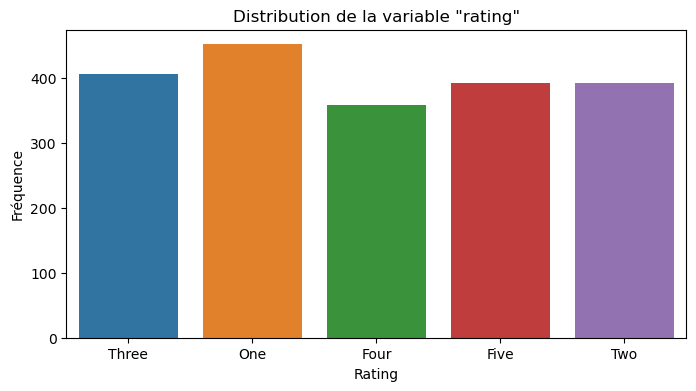

In [67]:
# Distribution de la variable 'rating'
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='rating')
plt.title('Distribution de la variable "rating"')
plt.xlabel('Rating')
plt.ylabel('Fréquence')
plt.show()

In [68]:
df1['rating'].value_counts()

rating
One      452
Three    406
Five     392
Two      392
Four     358
Name: count, dtype: int64

In [69]:
df1['rating'].value_counts().sort_index()

rating
Five     392
Four     358
One      452
Three    406
Two      392
Name: count, dtype: int64

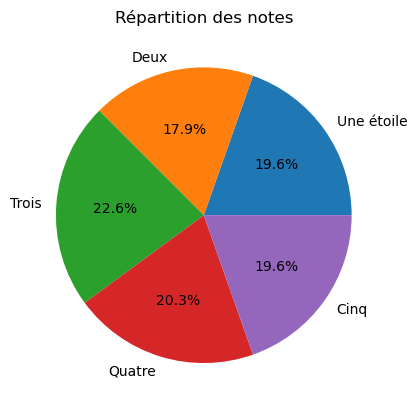

In [70]:
#représenter la répartition des notes en Pie Chart
notes = df1['rating'].value_counts().sort_index()
labels = ['Une étoile', 'Deux', 'Trois', 'Quatre', 'Cinq']
plt.pie(notes, labels=labels, autopct='%1.1f%%')
plt.title("Répartition des notes")
plt.show()

In [71]:
books_category_books = df1[df1['category'] == 'Books']
books_category_books.shape

(1000, 5)

In [72]:
books_category = df1[df1['category'] != 'Books']
books_category.shape

(1000, 5)

In [73]:
print(df1['title'].nunique())

999


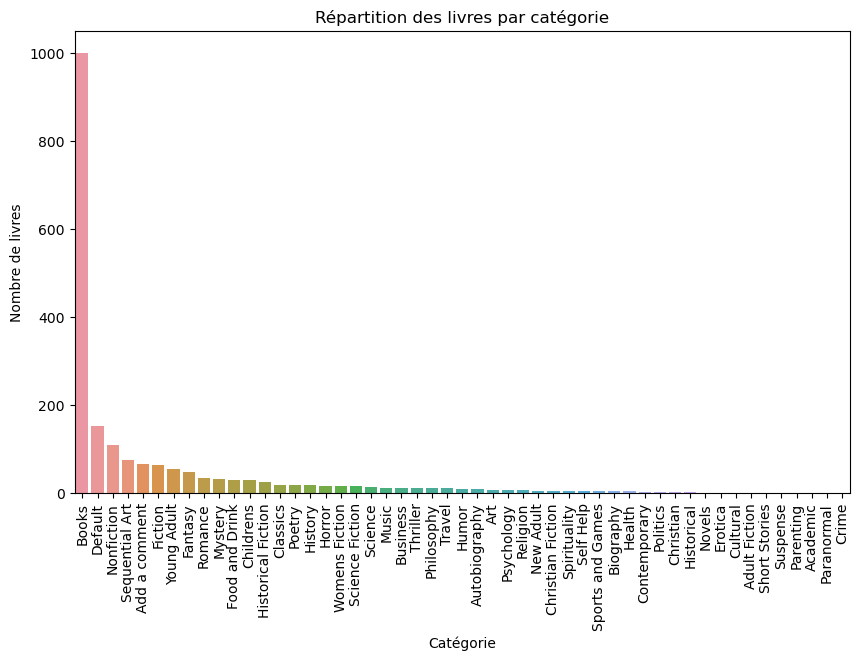

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df1, order=df1['category'].value_counts().index)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de livres')
plt.title('Répartition des livres par catégorie')
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

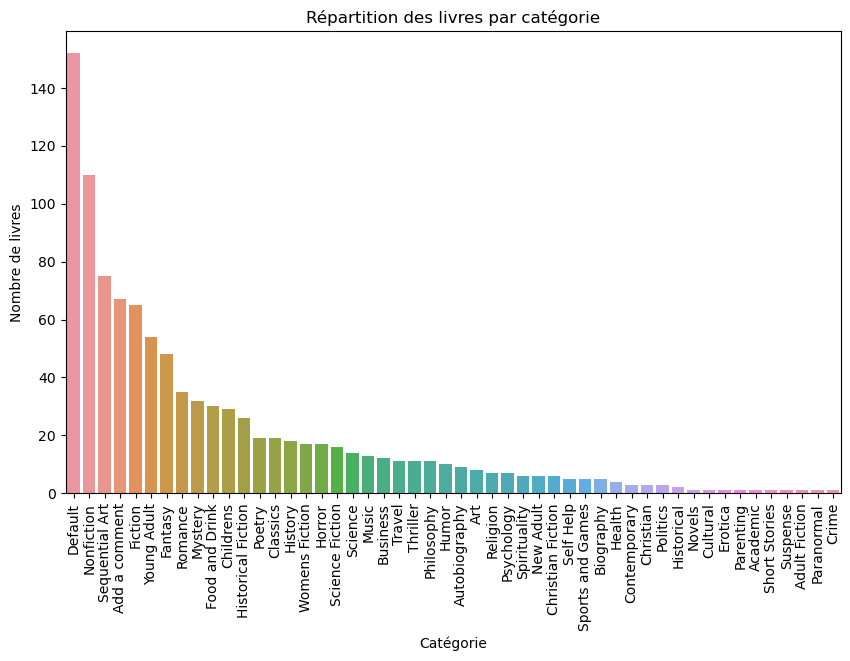

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df1[df1['category'] != 'Books'], order=df1[df1['category'] != 'Books']['category'].value_counts().index)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de livres')
plt.title('Répartition des livres par catégorie')
plt.xticks(rotation=90) 
plt.show()

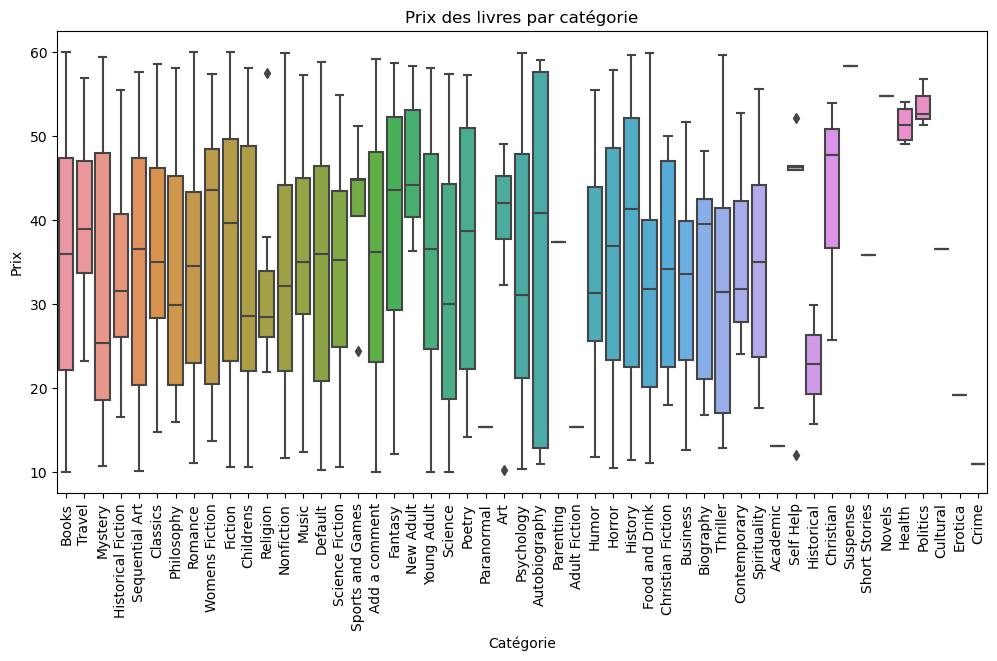

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df1)
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.title('Prix des livres par catégorie')
plt.xticks(rotation=90)
plt.show()